<a href="https://colab.research.google.com/github/kiwi9171/didactic-carnival/blob/main/Cheat_Sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
# general imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col

# definition cronbachs alpha
def cronbach (data):
  k=data.shape [1]
  varX=data.sum(axis=1).var()
  sumVar=data.var(axis=0).sum()
  return k/(k-1)*(1-sumVar/varX)

# imports for panel regression
!pip install linearmodels
from linearmodels import PanelOLS

# imports Regressors
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# imports Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# imports model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# imports metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# imports inspection
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import plot_partial_dependence

# import dataframe
path_to_df = 'https://raw.githubusercontent.com/armoutihansen/EEMP2021/main/datasets/AMP_Data.csv'
df = pd.read_csv(path_to_df)

#General

In [ ]:
# prints help for every python function
help(df.head)

In [ ]:
# square a number in python
4**2

In [ ]:
# if statement
if 4**2 == 16:
  print("Correct")

In [ ]:
# example for a python list
l1 = [i for i in range(10)]
print(l1)

In [ ]:
# access a list in python
print(l1[2])
print(l1[3:7])

In [ ]:
# example for loop
result = 0
for number in range(0, 10, 2):
  result += number
  print(result)

In [ ]:
# define an empty list named pred_list
pred_liste = []

In [ ]:
# store results in a list
# define an empty list
pred_liste = []
# run a for loop
for i in range(100):
  pred_liste.append(1+i)
print(pred_liste)

#Basics, Exploratory Data Analysis and Descriptive Statistics

In [ ]:
# gives back the #rows and #columns
df.shape

In [ ]:
# gives back all columns
df.columns

In [ ]:
df.info()

In [ ]:
#print summary statistics for all variables
df.describe()

In [ ]:
# print the first few rows of df
df.head()

In [ ]:
# gives back the values of a certain column
print(sorted(df['country'].unique()))

In [ ]:
# gives back the distribution of certain values
# exchanging value_counts() with value_counts(normalize=True) shows percentages
print(df['country'].value_counts())

In [ ]:
#print summary statistics for one specific variable
df.management.describe()

In [ ]:
#compute mean 
df.management.mean()

In [ ]:
#compute standard deviation
df.management.std()

In [ ]:
# distribution of a specific column
print(df['dead'].value_counts(normalize=True))

In [ ]:
#explore summary statistics for specific subgroups (rows)
df.groupby('year').management.describe()

In [ ]:
# print mean of one variable dependent on another variable
mean_mgm_score_by_cou = df['management'].groupby(df['country']).mean()
print(mean_mgm_score_by_cou)

In [ ]:
#print correlation matrix
df.corr()

In [ ]:
#show correlation between two variables
df.filter(items=['management', 'roce']).corr()

In [ ]:
#show correlation between all variables starting with "talent"
df.filter(regex='talent*').corr()

In [ ]:
# create a new vairable
df['china_dummy'] = df['country'] == 'China'

In [ ]:
#create a new variable that computes the average of all talent variables
#mean function: axis=0 --> rows/observations; axis=1 --> columns/variables
df['talent'] = df.filter(regex='talent*').mean(axis=1)
print(df.talent)

In [ ]:
#standarize variables
df['tal_std']= (df.talent-df.talent.mean()/df.talent.std())
print(df.tal_std)

In [ ]:
#cronbach's alpha function
# Cronbach's alpha is frequently applied measure for the internal consistency of a scale
# good internal consistency if alpha > 0.8

def cronbach(data):
  k=data.shape[1]
  varX=data.var(axis=0).sum()
  return k/(k-1)*(1-sumVar/varX)

#Graphs & Plots

In [ ]:
#prints a barplot
sns.barplot(x='year', y='roce', data=df)
# 95 % confidence bands are included

In [ ]:
#prints a scatter plot where each dot is a data point
sns.relplot (x='year', y='roce',data=df)

In [ ]:
#prints a histogram
sns.distplot(df['roce'])

In [ ]:
#prints a scatter plot with a gression line; x_bins changes the amount of blue dots; order= u-shape vs s-shape
sns.regplot(y='roce',x='year', data=df, x_bins=10, order=2)

In [ ]:
# plot histogram
plt.hist(df['management'])
plt.xlabel('management score')
plt.ylabel('count')
plt.show();

In [ ]:
# plot Scatter plot 
plt.scatter(df['management'],df['roce'])
plt.xlim(0,)
plt.xlabel('management')
plt.ylabel('roce')
plt.show();

#Simulate a Data Set

In [ ]:

#Simulate a data set

#n = number of observations
n = 100

#create a DataFrame with n rows
df2=pd.DataFrame(index=range(n))

#create a colum x that is a vector of n normally distributed random variables
# in this case: 100= mean, 15 = standard deviation
df2['x']=np.random.normal(100,15,n)
#create a column y to a Cconditional expectation function (CEF) that looks like this --> y = 200 + 2x
# second part of the equotion is the noise with a mean of 0 and a std of 500
df2['y']=200+2*df2['x'] + np.random.normal(0,500,n)
df2

In [ ]:
#create a dummy variable which takes value 1 for 5 % randomly chosen individuals
n = 100
df2['dummy1']=np.random.binomial(1, 0.05,n)
sns.distplot(df2['dummy1'])

In [ ]:
#generate a uniformally distributed random variable named rdage
df2['rdage'] = np.random.uniform(18, 70, size =n)
sns.distplot(df2['rdage'])

In [ ]:
#generate a uniformally distributed random variable named rdincome
df2['rdincome'] = np.random.normal(0, 10, size =n)
sns.distplot(df2['rdincome'])

#Data Manipulation

In [ ]:
# remove missing values from a DataFrame
df_new = df.dropna()

In [ ]:
# drop columns
df_new = df_new.drop(columns=['dead','year'])

In [ ]:
#create a dummy variable with a certain condition
# == --> equals
#other possible operators: <, >, >=, <=, !=
df['dummy_2006'] = (df['year']== 2006)
# creates a dummy variable with only zeros
df['dummy_test'] = 0 

In [ ]:
#select specific columns of the data
df['management']

In [ ]:
#select a column if it satisfies a certain condition
df[df['year']==2006]

In [ ]:
#select a column if it satisfies more than one condition
# for and use & 
# for or use |
df[(df['year']==2006) & (df['talent']==5)]

In [ ]:
# slice the data by rows and columns or just rows or just columns
df.loc[0:100, ['roce', 'country']]

#Regression

In [ ]:
#estimates an ols regression of talent and management on roce --> regresses y (roce) on x1 (talent) and x2 (management)
# uses statsmodels
reg1 = smf.ols('roce ~ talent + management', data=df).fit()
reg2 = smf.ols('roce ~ year', data=df).fit()
print(reg1.summary())

**Interpretation for a regression coefficient**: The coefficient of the dependent variable 'talent' amounts to 1.4223 and is statistically significant at the 1% level (p==0.007). 

When the dependent variable talent increases by one unit the roce increases by 1.4223 units. Thus, the retrun on capital employed (roce) increases if the employees of a firm are more talented.

In [ ]:
#allows to compare multiple regressions in one table
print(summary_col([reg1, reg2], stars=True))

In [ ]:
#for categorial variables dummy variables can be generated automatically with C(categorial variable)
reg3 = smf.ols('roce ~ talent + management + C(hour_miss)', data=df).fit()
print(reg3.summary())

In [ ]:
#interaction terms can be genrated by using *
# interpreting interaction term --> might be helpful to run another regression
reg4 = smf.ols('roce ~ talent * management', data=df).fit()
print(reg4.summary())

In [ ]:
# transform variables within the regression equation
reg5 = smf.ols('roce ~ np.log(talent) + management', data=df).fit()
print(reg5.summary())

In [ ]:
#cluster standard errors in a regression
#standard errors are estimated under the assumption that they are independent
#if they are not independent --> p-values are smaller than they should be
#solution: use clustered standard errors
reg6 = smf.ols('roce ~ talent + management', data=df).fit(cov_type='cluster', cov_kwds ={'groups': df['account_id']})
print(reg6.summary())

#Panel Data

In [ ]:
#way to tackle Omitted Variable Bias (OVB) --> Panel Data
# also called Fixed Effects Regression
# for this data: emp = number of emplyoees, ppent = capital, account_id = identifier for each firm
df = df.set_index(['account_id','year'])
df['sales_log'] = np.log(df['sales'])
df['emp_log'] = np.log(df['emp'])
df['ppent_log'] = np.log(df['ppent'])

reg7 = PanelOLS.from_formula('sales_log ~ management + emp_log + ppent_log + EntityEffects + TimeEffects', data=df).fit()
print(reg7)

#Machine Learning

In [ ]:
#define y as a vector and X as a matrix
y = df['roce']
X = df[['management']]

In [ ]:
# devide X and y in training and test data; test_size is the amount of the data in % used for the test sample
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=181)

#ML Regression


In [ ]:
#linear regression using Scikit-Learn
lr = LinearRegression().fit(X,y)

In [ ]:
# make a prediction at X = [[1]]
pred1 = lr.predict([[1]])
print(pred1)

In [ ]:
# K Nearest Neighbors regression (knn regression) in Scikit-Learn
# n_neighbors=x --> x is the number of neighbors
knn = KNeighborsRegressor(n_neighbors=10).fit(X,y)
# make a prediction at X = [[1]]
pred2 = knn.predict([[1]])
print(pred2)

In [ ]:
# Suppose you estimate f by f^ = B^0 + B^^1 * age. Attempt to estimate the (squared) bias and variance of f^ at age = 50, based on a sample size of 
# 10,000 by resampling the data 100 times.
# gives back the squarred bias and the variance
# Same thing possible for knn regression
pred_list = []
for i in range(100):
  n=10000
  df5 = pd.DataFrame(index=range(n))
  df5['age'] = np.random.uniform(18,70, size=n)
  df5['income'] = (2*df5['age']-0.002*df5['age']**2 + np.random.normal(0,10,size=n))
  y1 = df5['income']
  X1 = df5[['age']]
  # .values was added to get rid of the useless error message
  lr2 = LinearRegression().fit(X1.values,y1)
  pred4 = lr2.predict([[50]])
  pred_list.append(pred4)

Var_lr = np.var(pred_list)
Bias_lr = (95-np.mean(pred_list))**2
print(Var_lr)
print(Bias_lr)

#ML Classification

In [ ]:
# fit a logistic regression from Scikit-Learn
# y has to be binary
y_cl = df['hour_miss']
X_cl = df[['management']]
# devide X and y in training and test data; test_size is the amount of the data in % used for the test sample
X_train, X_test, y_train, y_test = train_test_split(X_cl,y_cl, test_size=0.5, random_state=181)
logreg = LogisticRegression().fit(X_cl,y_cl)
pred_logreg = logreg.predict([[100]])
print(pred_logreg)

In [ ]:
# estimate the train misclassification rate
pred_lreg_train = logreg.predict(X_train)
print('Train Misclassification Rate:', 1-accuracy_score(y_train, pred_lreg_train))

# estimate the test misclassification rate
pred_lreg_test = logreg.predict(X_test)
print('Test Misclassification Rate:', 1-accuracy_score(y_test, pred_lreg_test))

In [ ]:
# fit a KNN classification in Scikit-Learn
# n_neighbors = x --> x is the number of neighbors
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

#Calculate train misclassifcation rate
knn_train_pred = knn.predict(X_train)
print('Train Misclassification Rate:', 1-accuracy_score(y_train, knn_train_pred))

#Calculate test misclassifcation rate
knn_test_pred = knn.predict(X_test)
print('Test Misclassification Rate:', 1-accuracy_score(y_test, knn_test_pred))

In [ ]:
# 5-fold cross validation for a knn Regressor
# typically 5 or 10 fold corss validation
n= 10000
df5 = pd.DataFrame(index=range(n))
df5['age'] = np.random.uniform (18,70, size=n)
df5['income']=(2*df5['age']-0.002*df5['age']**2 + np.random.normal(0,10,size=n))
y_rg = df5['income']
X_rg = df5[['age']]
X_train, X_test, y_train, y_test = train_test_split(X_rg,y_rg,test_size=0.25)

# k_neighbors = {10,11,...,100}
# for loop gives back the the cross validation average error for each k
plot_cv =[]
plot_k =[]
for k in range(10,101):
  knn = KNeighborsRegressor(n_neighbors = k)
  cv = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')*-1
  mean_cv = np.mean(cv)
  plot_cv.append(mean_cv)
  plot_k.append(k)

# prints a diagram showing the average croiss validation error for each k
plt.plot(plot_k,plot_cv)

In [ ]:
# find out the minimum k
# + 10 because of the k chosen
# np.argmin gives back the minimum value
np.argmin(plot_cv)+10

In [ ]:
# calculate the mean squarred error (MSE) for the optimal k
# instead of (np.argmin(plot_cv)+10) use the number of the minmal k
knn_opt = KNeighborsRegressor(n_neighbors=(np.argmin(plot_cv)+10)).fit(X_train,y_train)
predictions = knn_opt.predict(X_test)
MSE(predictions,y_test)


In [ ]:
# just for comparison: the worst k 
knn_nopt = KNeighborsRegressor(n_neighbors=10).fit(X_train,y_train)
nopt_preds = knn_nopt.predict(X_test)
MSE(nopt_preds,y_test)

#ML Decision Trees

In [ ]:
# Decision Tree for regression: fit tree and predict
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=181)
rg_dt = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)
rg_dt_preds = rg_dt.predict(X_test)

# print MSE
print('MSE:',MSE(y_test,rg_dt_preds))

In [ ]:
#plot a tree
plt.figure(figsize=(20,10))
tree.plot_tree(rg_dt, feature_names=X_train.columns)

In [ ]:
# Decision Tree for classification: fit tree and predict
X_train, X_test, y_train, y_test = train_test_split(X_cl,y_cl,test_size=0.5)
cl_dt = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
cl_dt_preds = cl_dt.predict(X_test)

# print misclassifcation rate (1 - accuracy_score)
print('Misclassification Rate:', 1-accuracy_score(y_test, cl_dt_preds))

#ML Ensemble Learning

In [ ]:
# Bagging --> Random Forest
#regression
# fit a random forest on the training set for a regression problem
X_train, X_test, y_train, y_test = train_test_split(X_rg,y_rg,test_size=0.5)

rf_rg = RandomForestRegressor(n_estimators=1000, max_depth=None, max_features='sqrt', random_state=181, n_jobs=-1)
rf_rg.fit(X_train, y_train)
rf_rg_preds = rf_rg.predict(X_test)

# print MSE
print('MSE:',MSE(y_test,rf_rg_preds))

In [ ]:
# Bagging --> Random Forest
# classification
# fit a random forest on the training set for a classification problem
X_train, X_test, y_train, y_test = train_test_split(X_cl,y_cl,test_size=0.5)

rf_rg = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='sqrt', random_state=181, n_jobs=-1)
rf_rg.fit(X_train, y_train)
rf_rg_preds = rf_rg.predict(X_test)

# print misclassifcation rate (1 - accuracy_score)
print('Misclassification Rate:', 1-accuracy_score(y_test, rf_rg_preds))

In [ ]:
# Boosting --> Gradient Boosting
# Regression problem
# fit a Gradient Boosting Regressor on the training set
X_train, X_test, y_train, y_test = train_test_split(X_rg,y_rg,test_size=0.5)

gb_rg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=181)
gb_rg.fit(X_train, y_train)
gb_rg_preds = gb_rg.predict(X_test)

# print MSE
print('MSE:',MSE(y_test,gb_rg_preds))

In [ ]:
# Boosting --> Gradient Boosting 
# Classification problem
# fit a Gradient Boosting Classifier on the training set
X_train, X_test, y_train, y_test = train_test_split(X_cl,y_cl,test_size=0.5)

gb_cl = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=181)
gb_cl.fit(X_train, y_train)
gb_cl_preds = gb_cl.predict(X_test)

# print misclassifcation rate (1 - accuracy_score)
print('Misclassification Rate:', 1-accuracy_score(y_test, gb_cl_preds))

#ML Model Selection & Evaluation

**Parameter Grid choices:**

>We vary the **number of features** available to be between 1-9, the **maximum depth** to be between 1 and 100, the **minimum required observations per split and leaf** to be between 1 and 100 in order to decorrelate the trees in our ensemble. We vary the **number of trees** to be between 500-1000 trees to make sure that we have a sufficient amount of them.

In [ ]:
path_to_df = 'https://raw.githubusercontent.com/armoutihansen/EEMP2021/main/datasets/data_task2__.csv'
df_rfrg = pd.read_csv(path_to_df)
df_rfrg = df_rfrg.drop(columns=['personid','wage'])
df_rfrg = df_rfrg.dropna()
y_rfrg = df_rfrg['z_performance']
X_rfrg = df_rfrg.drop(columns=['z_performance'])
X_train, X_test, y_train, y_test = train_test_split(X_rfrg,y_rfrg, test_size=0.25, random_state=181)

rf = RandomForestRegressor()

param_grid = {'max_features': np.arange(1, 9), 'max_depth': np.arange(1,100), 'min_samples_split': np.arange(1, 100),
            'min_samples_leaf': np.arange(1, 100), 'n_estimators': np.arange(500, 1001, 100)}

rf_cv = RandomizedSearchCV(rf, param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=-1).fit(X_train,y_train)
print(rf_cv.best_estimator_)

In [ ]:
# data import & manipulation for model selection by CV
path_to_df = 'https://raw.githubusercontent.com/armoutihansen/EEMP2021/main/datasets/Default.csv'
df_ms = pd.read_csv(path_to_df)
df_ms['student'] = pd.get_dummies(df_ms['student'], drop_first =True)
X=df_ms[['balance','income','student']]
y=df_ms['default']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
# we perform model selection on the training set using ensemble methods --> numer of hyperparameters to choose from
# for the Random Forest --> number of estimators, the number of inputs available for consideration when a decision tree in the ensemble makes a split
# for Gradient Boosting --> number of estimators, maximum depth of each tree in the ensemble
# for Regression use scoring='neg_mean_squared_error'
# for Classification use scoring='accuracy'
# perform model selection by CV in Scikit-Learn:
# always set n_iter=10

# In this case Random Forest Classifier --> use scoring='accuracy'
rf_ms = RandomForestClassifier()
param_grid = {f'n_estimators':np.arange(100,1000),'max_features':np.arange(1,4)}
cv_ms = RandomizedSearchCV(rf_ms, param_grid, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=11).fit(X_train,y_train)


In [ ]:
#print the best estamator
print(cv_ms.best_estimator_)

In [ ]:
# print the MSE of the best estimator
rf_ms_preds = cv_ms.best_estimator_.predict(X_test)
print('MSE:', 1-accuracy_score(y_test,rf_ms_preds))

In [ ]:
# model interpretation
# access the beta coefficients in a linear regression lr
# to get the intercept (B^0)
print(lr.intercept_)

In [ ]:
# to get the remaining coefficients ordered as in X_train
print(lr.coef_)

In [ ]:
# Neccessary for PDP

cv_ms.best_estimator_.fit(X_train, y_train)

In [ ]:
# Partial dependence (PDP)
# One-way PDP tells us how the dependent variable interact with the considered input keeping all other inputs constant.
# Two-way PDP tells us how the dependent variable jointly interact with the two considered inputs keeping all other inputs constant.
# this procedure is similar for gradient boosting and for regression problems

#features = ['balance', 'income']
#PartialDependenceDisplay.from_estimator(cv_ms.best_estimator_, X_train, features, kind='average');

In [ ]:
# plot the variable importance
# this procedure is similar for gradient boosting and for regression problems
plt.figure(figsize=(20,7))
fig = pd.Series(cv_ms.best_estimator_.feature_importances_*100, index=X_train.columns).plot(kind='barh')
plt.xlabel('Percentage Improvement')
plt.ylabel('Feature')
plt.show();

In [ ]:
# Neccessary for r^2 calculation
y_PDP = df['roce']
X_PDP = df[['management', 'talent', 'emp']]
X_train, X_test, y_train, y_test = train_test_split(X_PDP,y_PDP,test_size=0.5)
lr_r = LinearRegression().fit(X_train, y_train)
lr_r_preds = lr_r.predict(X_test)

# estimate the out-of-sample R^2 for e.g. a linear regression lr
r2_score(y_test, lr_r_preds)

# this method works similar for other regression methods

In [ ]:
# Partial dependence (PDP)
# One-way PDP tells us how the dependent variable interact with the considered input keeping all other inputs constant.
# Two-way PDP tells us how the dependent variable jointly interact with the two considered inputs keeping all other inputs constant.
# this procedure is similar for gradient boosting and for regression problems

features = ['management', 'talent']
PartialDependenceDisplay.from_estimator(lr_r, X_train, features, kind='average');

#Contents of the Lecture


##Survey Data & Scale Reliability

**Three different types of studies:**


*    Studies based on **observational** data --> e.g. data from surveys
*   **Laboratory** experiments --> e.g. data generated by researches in the lab
*   **Field** experiments --> e.g. Randomized controlled trial (RCT) or A/B tests

**Two types of data:**

*   Administrative data (O-data) --> data from IT-systems on operational processes: directly available through companies ERP-system & rather accurate
*   Survey data (X-data) --> typically data generated through surveys: cheapt to collect & measures subjective perceptions

**How to estimate the causel effect of a given practice?**

*   Randomized Controlled Trial (RCT) (A/B Test)
*   Panel Data --> common trends get visible

**Psychological Construct**

A Psychological construct is a label for a cluster of covarying behaviours or
attitudes (such as job satisfaction, job engagement, but also of personality
traits such as conscientiousness, extraversion, etc.) Typically the item responses are added up to a score and the total score than represents a person's psotition on the construct.

> --> The reliability is increasing with the number of measures








##Regression

Important distinction: **Prediction** and **Causality** --> Two different questions: 

*   Prediction: To what extent does knowing x allow us to predict y?
*   Causality: To what extent does a change of x lead to a change of y?

--> Answering the first (prediction) is typically substantially simpler than
answering the second (causality)


**Conditional Expectation Function (CEF):**


*   CEF = E[Yi|Xi]
*   Useful Interpretation: Think of E[Yi|Xi] as a function stating the mean of Yi among all people who share the same value(s) of Xi
* CEF describes the best minimum mean square error (MMSE) prediction of Yi given Xi


**Important distinction: Population vs Sample** --> we can estimate the population CEF from a representative sample


**Why to use a log in a regression?**


*   logs are less sensitive to outliers & may reduce heteroscedasticity
*   logs sometimes lead to more convenient interpretations

**Summary Regression analyses**


*   Regression provides the best linear predictor for the dependent variable;
the CEF provides the best unrestricted predictor
*   Even if the CEF is non-linear, regressions provide the best linear
approximation
* imposing linearity reduces complexity
+ allows for more accessible interpretations
+ **but:** danger of oversimplification






##Statistical Tests



*   Standard errors reported in regression tables yield the (estimated) standard deviation of the estimated B^
+ The standard errors are used to construct the t-statistics
+ From that we can compute the p-values (reported by statsmodels automatically)


**Intuition:**


*   If I would draw different samples (of the given size) I would obtain different estimators B^ 
+ What is the standard deviation of these B^?
+ When this is small: we are close to the true B
+ When this is large: there is much noise and therefore it is likely that the
estimated B^ is further away from the true B

**What the p-value tells us:**


*   What is the probability of obtaining an estimate that is at least as(distant from 0) as the value of B^j I have estimated when the true value of were B = 0
+ When this probability is smaller (computed using the estimated standard
errors) we can be more certain that the true B is not zero
+ For instance, when p < 0.05 for a certain coefficient, we say that the
coefficient is statistically significant at the 5 % level


##Regression and Causality

**Basic problem** with regressions and causality: we don't know if the causal expectation function (CEF) is causal

**Randomized Controlled Trials (RCT or A/B tests)** eliminate the **selection bias** if the individuals are **randomly** assigned to the treatment

**The Conditional Independce Assumption (CIA)**

*   if the CIA holds --> conditional on X the treatment Ci is independent of potential outcomes 
*   then the difference in conditional expectations has a causal interpretation

**Omitted Variable Bias**

*   if the treatment effect is influenced by another variable the estimate of the causal effect is biased


**Measurement Error**

+ attenuation (=Schwächung) bias --> if a variable has a measurement error the regression underestimates the causal effect

##Panel Data & Fixed Effects

One way to potentially tackle the omitted variable bias (OVB) is **longitudinal data** (=data collected over time) when the omitted factors are stable over time

**Fixed Effect Regressions (Fixed Effect Models):**

*   allow to estimate effects of the explaining variable by eliminating trend effects


Caveats of Fixed Effect Regressions:

*   **Common trend assumption:** You assume that treatment and control group follow the same underlying time trend --> important to keep in mind when interpreting the results of the fixed effects regression causally 
*   Fixed effects can only eliminate **time constant omitted variables**


##Machine Learning

###Unsupervised Learning

+ we observe inputs but no outputs
+ We can seek to understand the relationship between the variables or between the observations
+ Example: Cluster customers into certain groups based on multiple characteristics 


###Supervised Learning

*   The task of learning a function that maps an input to an output based on. example input-output pairs.
+ The learning method learns from a training sample consisting of a set of input-output observations.
*   Two main problems: **regression** & **classification** problems

####Regression

*   Deals with problems in which y is continuous or discrete and ordered
+ Example: predict a house's selling price based on the features (#number of rooms) of it
*   Methods used in this lecture: Linear Regression, K-Nearest-Neighbor (KNN) Regression, Decision Tree Regressor, Random Forest Regressor & Gradient Boosting Regressor
+ metric for evaluating regression methods: **Mean Squarred Error (MSE)**



####Classification

*   Deals with problems in which y takes values in a finite and unordered set
+ Example: Predict whether an employee will leave a company based on his/her age, wage, ...
*   Methods used in this lecture: Logistic Regression, K-Nearest-Neighbor (KNN) Classifier, Decision Tree Classifier, Random Forest Classifier & Gradient Boosting Classifier
+ metric for evaluating classification methods: **Misclassification Rate**


####Parametric vs Non-Parametric methods

*   Parametric methods: make an assumption about the functional form of of f
>+ Advantages:
>>*   less overfitting
>>*   more easy to interpret
*   Non-Parametric methods: No explicit assumptions about the funtional form of f
>+ Advantages
>>* better prediction accuracy


####Model Selection

**Model Selection vs Model assessment**

*   **Model Selection =** estimating the performance of a model with different hyper parameters in order to choose the best one.
*   **Model Assessment =** having chosen a final model, estimating its prediction error (generalization error)


**No Free Lunch Theorem:** No one method dominates all other over all possible data sets 
> --> Model selection is neccessary

*   when it comes to the selection of the best model, the in-sample error provides a poor estimate of a model's general performance --> this is because the selection based on the in-sample error favors complex models that fit the noise in the sample
*   Consequence: It is important to evaluate the model's predictions on a test set
+ **Be aware:** If we use the training data to get an estimate of the regressor's general performance, we are using data that the model already "knows" and was fitted on. Thus, this will generally lead to a too optimistic estimate. Therefore, it is better to use the test data which the model has not "seen" to get the estimate.
+ if we have two models with approximately equal performance --> choose the simpler one of the two because it easier to interpret


**Hyperparameters =** e.g. the number of neighbors for a KNN method.


####Bias-Variance-Tradeoff

The Bias-Variance Tradeoff describes the problem of minimizing two sources of mistakes – the bias and the variance – at the same time. There is a interaction between bias and variance which leads to the dilemma.
> --> Two competing forces

> --> Bias leads to mistakes based on false assupmtions (underfitting)

> --> Variance leads to mistakes based on overfitting the training data

####Cross Validation

+ the error estimates estimates of the validation approach may heavily depend on the splits of the sample --> use cross validation
*   When choosing the number of folds in the CV procedure, we are facing a bias-variance trade-off.
*   If we pick a low number of folds, we will tend to get biased estimate
+ If we choose a high number of folds, our estimates will have high variance.
+ The optimal number of folds depends on the model's learning curve, which is unknown.
+ A often used compromise is to choose k=5 or k=10.

Choosing Hyperparameters with CV:

*   "One standard error rule" --> choose the most parsimonious model with error no more than one standard error above the best error

###Decision Trees

+ versatile ML algorithms that can perform both classification and regression tasks
+ tree-based method that divides the inputs into a number of simple regions
+ Regions (e.g. R1, R2, R3) --> leaves of the tree
+ split points --> internal nodes
+ initial node --> root node
+ segments of the tree that connect the nodes are branches
+ regression decision trees use recursive binary splitting to build the tree
+ classification decision trees use gini index to build the tree
+ **decision trees are simple and easy to interpret**
+ **but also very sensitive to small variations in the data --> instability**


###Ensemble Learning

####Bagging (Bootstrap Aggregating)

+ **Idea:** The effectiveness of using a set of models instead of one is the better the less they are correlated. In turn this lowers the variance of our estimate.
+ One way to decrease the variance would be to train a set of models from
the same method (e.g.a Decision Tree) on B different training samples drawn from the population
+ for regression problems the estimates of the singles methods are averraged
+ for classification problems there is majority voting
+ individual decision trees have a high variance but a low bias --> averaging then lowers the variance

**Random Forest**

*   ensemble of decision trees that are generally trained via the bagging method
*   Difference between bagged trees and RF: The fundamental difference is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.

> Most important hyperparameters for RF Regressor:
+ (a) the number of trees
+ (b) the number of features available to each tree when making a split
+ (c) the maximum depth of each tree in the ensemble
+ (d) the minimum required observations per split
+ (e) the minimum required observations per leaf.

####Boosting

+ Combine several weak lerners into one strong learner
>+ Weak lerner: computionally model that performs slightly above chance
+ Idea: Train models sequentially on the (modified) training data, where each succeeding model tries to correct its predecessor
+ in general, models that learn slowly tend to perform well


**Gradient Boosting**

*   GB works by sequentially adding models to an ensemble
*   each of the models attepts to correct for its predecessor
*   One may then stop the collection if no further improvement is observed 
for several rounds, or once a certain number of trees have been reached


###Remark Classification Errors


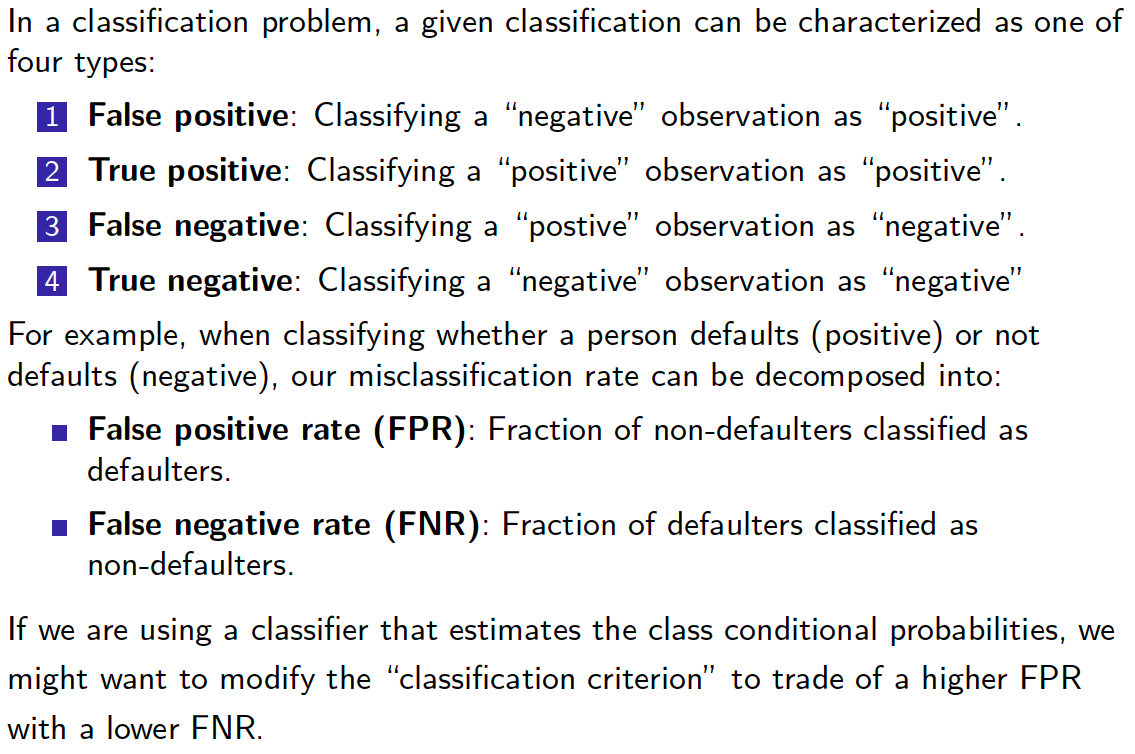

